In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import xarray as xr

import os
import math as m

In [12]:
from IPython.display import display,HTML
display(HTML('<style>.container {width: 80% !important}</style>'))

In [5]:
# directory = "C:/Users/user/Desktop/my_folder/t6_extra_output/"
directory = "E:/Climate/t6_extra/"

file_list = np.array ([file for file in os.listdir(directory) if file.endswith('.nc')])
# file_list

In [17]:
# Aggregating files by dictionaries: 
# timcor (2d spatial data), fldcor (array of values by timesteps), timmean (single value)
file_dict = {}
timcor = {}
fldcor = {}
timmean = {}
for file in file_list:
    dataset = xr.open_dataset(os.path.join(directory, file), decode_times=False)
    file_dict[file] = dataset
    if 'ERA5' in file:
         continue
    if 'timcor' in file:
        timcor[file] = dataset
    if 'fldcor' in file and not 'timmean' in file:
        fldcor[file] = dataset
    if 'timmean' in file:
        timmean[file] = dataset

In [26]:
len(timcor)

25

In [ ]:
file = 'tas_Amon_ACCESS-CM2_ssp585_r1i1p1f1_185001-210012_r360x180_remap_C_regular_axis_year_anom_box_ymean.nc'

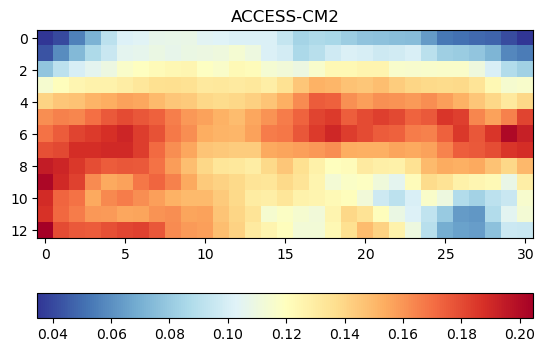

In [41]:
# Plotting single timcor
plt.title(file.split('_')[3], fontsize=12)
# plt.imshow(file_dict[file]['tas'][0][::-1],  vmin=0, vmax=0.5, cmap='RdYlBu_r')
plt.imshow(file_dict[file]['tas'][0][::-1], cmap='RdYlBu_r')


plt.colorbar(orientation='horizontal')
# plt.savefig("01.png")

In [551]:
def data_disp (keyword, stopword, data_dict, name_value, columns, n_lat, n_lon, pos_in_filename, title,
               scale_range, fig_name):

    #### Displayig 25 timcors (data_dict) -- this will work only for 2d arrays with 1 timestep
    if keyword == '' and stopword == '':
        data_list = np.array([file for file in data_dict.keys()])
    elif stopword == '':
        data_list = np.array([file for file in data_dict.keys() if keyword in file])
    else:
        data_list = np.array([file for file in data_dict.keys() if (keyword in file and not stopword in file)])
    
    data_list = np.sort(data_list)
    n_subs = len(data_list)
    fig, ax = plt.subplots(n_subs//columns, columns, figsize=(11.7, 8.3), layout='constrained')
      
    fig.suptitle (title, fontsize=14)

    for i in range(n_subs):
        row = i // columns
        column = i % columns

        name = data_list[i].split('_')[pos_in_filename]
        array = data_dict[data_list[i]][name_value][0]
        
        if scale_range == 0:
            plotted = ax[row, column].imshow(array[::-1], cmap='RdYlBu_r')
        if scale_range == 1:
            plotted = ax[row, column].imshow(array[::-1],  vmin=0, vmax=1, cmap='RdYlBu_r')
        else:
            plotted = ax[row, column].imshow(array[::-1],  vmin=-scale_range, vmax=scale_range, cmap='RdYlBu_r')
            
        ax[row, column].set_title(name, fontsize=10)

        if n_lat*n_lon != 0:
            # Counting how to place ticks
            longitudes = np.array (array['lon'], dtype='int')
            latitudes = np.array (array['lat'][0:180]+0.5, dtype='int')
            lon_step = len(longitudes)//(n_lon-1)
            lat_step = m.ceil(len(latitudes)/(n_lat))

            ax[row, column].tick_params(length=2, labelsize=6)
            ax[row, column].set_xticks(np.arange(0, len(longitudes), lon_step))
            ax[row, column].set_xticklabels(list(str(lon) + 'E' for lon in longitudes[::lon_step]))
            ax[row, column].set_yticks(np.arange(0, len(latitudes), lat_step))
            ax[row, column].set_yticklabels(list(str(lat) + 'N' for lat in latitudes[-1::-lat_step]))
            ax[row, column].grid(color='black', linestyle='dashed', linewidth=0.5, alpha=0.2)

    cbar = fig.colorbar(plotted, ax=ax, location='bottom', anchor=(0.5, 0), shrink=0.4, extend='both', orientation='horizontal')

    plt.show()
    if (fig_name != ""):    fig.savefig(fig_name)

In [43]:
# Open 25 timcors from my directory
i = 0
for file in file_dict.keys():
    if ('timcor' in file and not '__' in file):
        print (file)
        i+=1
i

timcor_tas_Amon_ACCESS-CM2_ssp585_r1i1p1f1_185001-210012_r360x180_remap_C_regular_axis_year_anom_box_ymean.nc
timcor_tas_Amon_ACCESS-ESM1-5_ssp585_r1i1p1f1_185001-210012_r360x180_remap_C_regular_axis_year_anom_box_ymean.nc
timcor_tas_Amon_AWI-CM-1-1-MR_ssp585_r1i1p1f1_185001-210012_r360x180_remap_C_regular_axis_year_anom_box_ymean.nc
timcor_tas_Amon_BCC-CSM2-MR_ssp585_r1i1p1f1_185001-210012_r360x180_remap_C_regular_axis_year_anom_box_ymean.nc
timcor_tas_Amon_CAMS-CSM1-0_ssp585_r1i1p1f1_185001-210012_r360x180_remap_C_regular_axis_year_anom_box_ymean.nc
timcor_tas_Amon_CESM2-WACCM_ssp585_r1i1p1f1_185001-210012_r360x180_remap_C_regular_axis_year_anom_box_ymean.nc
timcor_tas_Amon_CESM2_ssp585_r1i1p1f1_185001-210012_r360x180_remap_C_regular_axis_year_anom_box_ymean.nc
timcor_tas_Amon_CMCC-ESM2_ssp585_r1i1p1f1_185001-210012_r360x180_remap_C_regular_axis_year_anom_box_ymean.nc
timcor_tas_Amon_CNRM-CM6-1-HR_ssp585_r1i1p1f2_185001-210012_r360x180_remap_C_regular_axis_year_anom_box_ymean.nc
timc

25

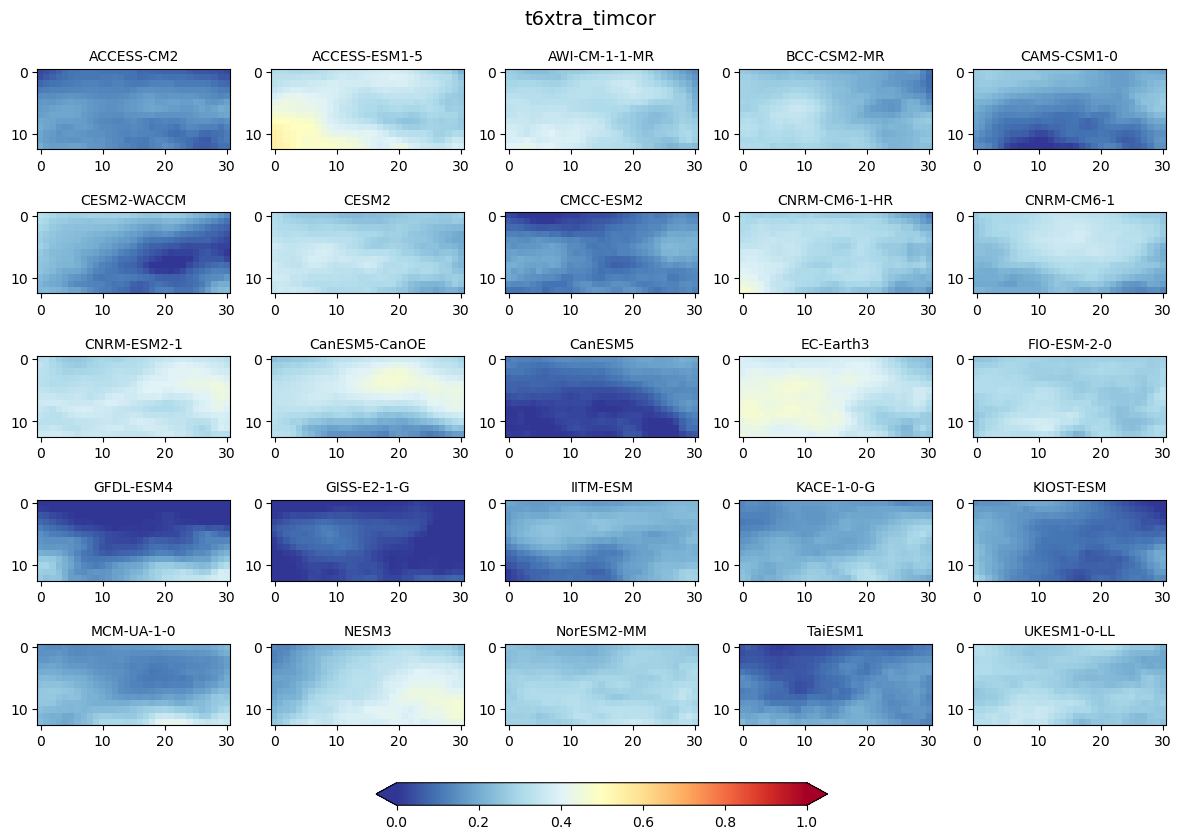

In [552]:
data_disp ('timcor', '', file_dict, 'tas', 5, 0, 0, 3, "t6xtra_timcor", 1, "")

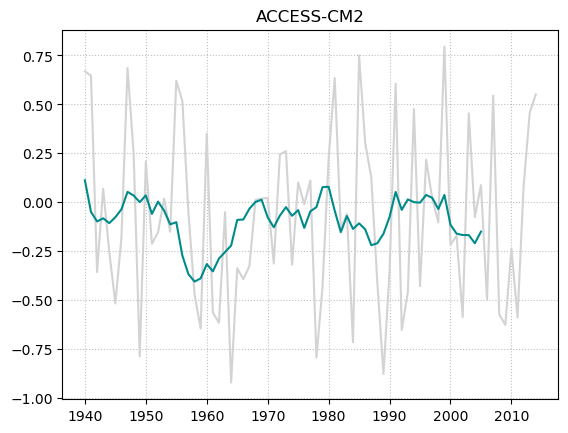

In [553]:
# Plotting one fldcor 
file = 'fldcor_tas_Amon_ACCESS-CM2_ssp585_r1i1p1f1_185001-210012_r360x180_remap_C_regular_axis_year_anom_box_ymean.nc'
array = file_dict[file]['tas'].values[:, 0, 0]
step = 10

run_mean = np.arange(0, len(array)-step+1, 1.0)

for i in range(0, len(array)-step+1):
    a = array[i:i+step-1].mean()
    run_mean[i] = a

plt.plot(np.arange(1940, 2015,1), array,  alpha=1, color='lightgray')
plt.plot(np.arange(1940, 2015-step+1,1), run_mean, color='darkcyan', linestyle='-')
plt.title(file.split('_')[3])
plt.grid(linestyle=':', alpha=0.8)
plt.show()

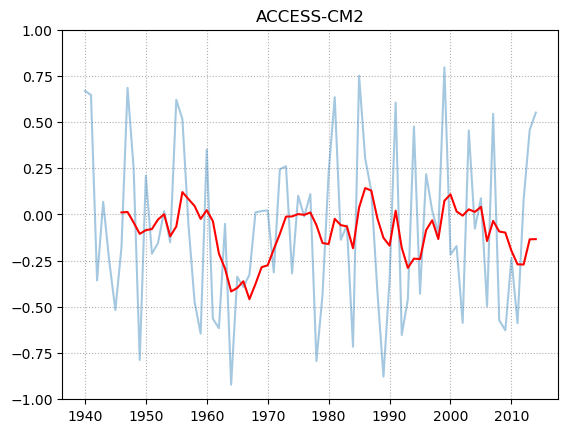

In [554]:
# Can convert everything into pd dataFrame while plotting single fldcor
file = 'fldcor_tas_Amon_ACCESS-CM2_ssp585_r1i1p1f1_185001-210012_r360x180_remap_C_regular_axis_year_anom_box_ymean.nc'
df = file_dict[file].to_dataframe(['time', 'bnds', 'lon', 'lat']).reset_index()
step = 7
df = df[df['bnds'] == 1]

plt.plot(np.arange(1940, 2015,1), df['tas'], alpha=0.4)

roll = df.rolling(step).mean()
plt.plot(np.arange(1940, 2015,1), roll['tas'], linestyle='-', color='red')

plt.title(file.split('_')[3])
plt.grid(linestyle=':')
plt.ylim(-1,1)
plt.show()

In [555]:
# Open 25 timcors from my directory
i = 0
for file in file_dict.keys():
    if ('fldcor' in file and not 'timmean' in file):
        print (file)
        i+=1
i

fldcor_tas_Amon_ACCESS-CM2_ssp585_r1i1p1f1_185001-210012_r360x180_remap_C_regular_axis_year_anom_box_ymean.nc
fldcor_tas_Amon_ACCESS-ESM1-5_ssp585_r1i1p1f1_185001-210012_r360x180_remap_C_regular_axis_year_anom_box_ymean.nc
fldcor_tas_Amon_AWI-CM-1-1-MR_ssp585_r1i1p1f1_185001-210012_r360x180_remap_C_regular_axis_year_anom_box_ymean.nc
fldcor_tas_Amon_BCC-CSM2-MR_ssp585_r1i1p1f1_185001-210012_r360x180_remap_C_regular_axis_year_anom_box_ymean.nc
fldcor_tas_Amon_CAMS-CSM1-0_ssp585_r1i1p1f1_185001-210012_r360x180_remap_C_regular_axis_year_anom_box_ymean.nc
fldcor_tas_Amon_CESM2-WACCM_ssp585_r1i1p1f1_185001-210012_r360x180_remap_C_regular_axis_year_anom_box_ymean.nc
fldcor_tas_Amon_CESM2_ssp585_r1i1p1f1_185001-210012_r360x180_remap_C_regular_axis_year_anom_box_ymean.nc
fldcor_tas_Amon_CMCC-ESM2_ssp585_r1i1p1f1_185001-210012_r360x180_remap_C_regular_axis_year_anom_box_ymean.nc
fldcor_tas_Amon_CNRM-CM6-1-HR_ssp585_r1i1p1f2_185001-210012_r360x180_remap_C_regular_axis_year_anom_box_ymean.nc
fldc

25

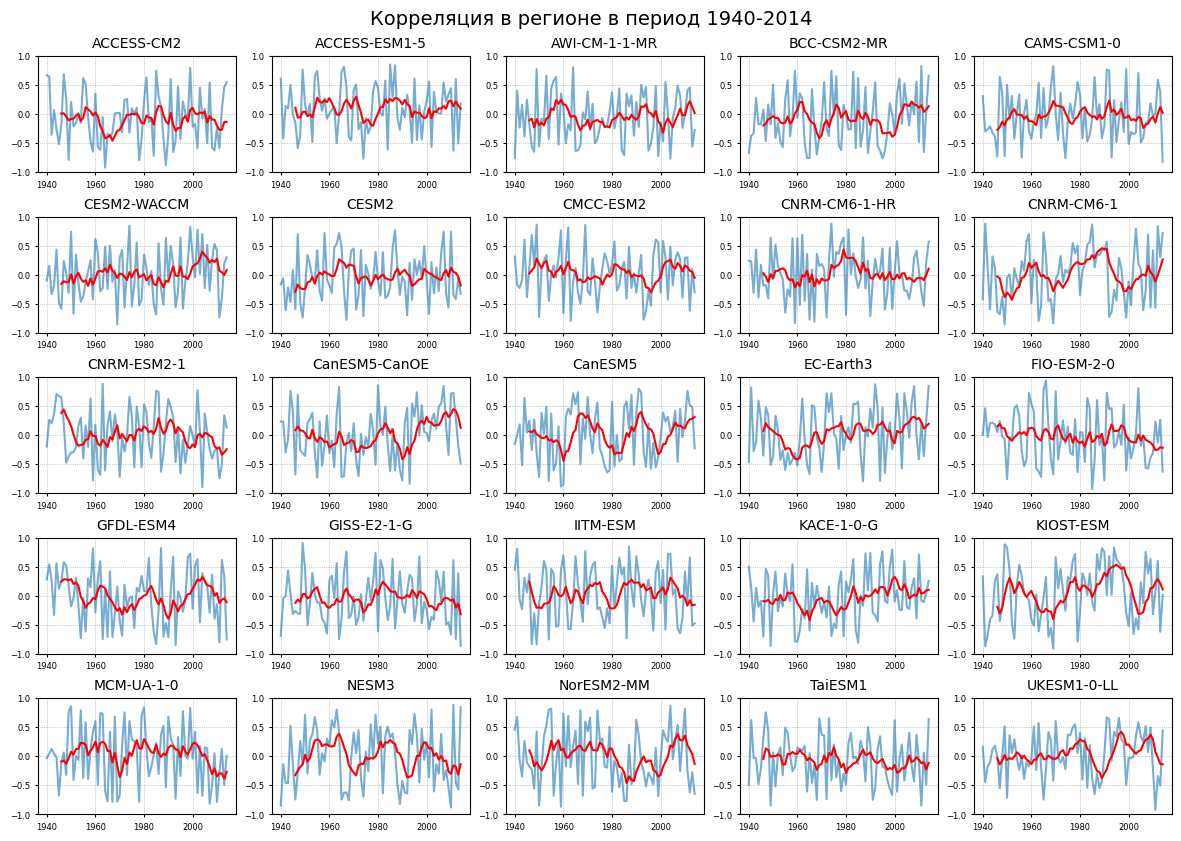

In [562]:
def data_plot (keyword, stopword, data_dict, columns, pos_in_filename, title, fig_name, step):

    #### Displayig 25 fldcor --- as 25 plots with y = value and x = time
    if keyword == '' and stopword == '':
        data_list = np.array([file for file in data_dict.keys()])
    elif stopword == '':
        data_list = np.array([file for file in data_dict.keys() if keyword in file])
    else:
        data_list = np.array([file for file in data_dict.keys() if (keyword in file and not stopword in file)])
    
    data_list = np.sort(data_list)
    n_subs = len(data_list)
    fig, ax = plt.subplots(n_subs//columns, columns, figsize=(11.7, 8.3), layout='constrained')
      
    fig.suptitle (title, fontsize=14)
    
    array = data_dict[data_list[0]]
    df = array.to_dataframe(['time', 'bnds', 'lon', 'lat']).reset_index()
    roll = df.rolling(step).mean()

    for i in range(n_subs):
        row = i // columns
        column = i % columns
#         line = str(data_list[i].split('_')[pos_in_filename +1:])

        name = str('-'.join(data_list[i].split('_')[pos_in_filename:next((index for index, elem in enumerate(data_list[i].split('_')) if 'ssp' in elem), None)]))
        array = data_dict[data_list[i]]
        df = array.to_dataframe(['time', 'bnds', 'lon', 'lat']).reset_index()
        df = df[df['bnds'] == 1]
        
        ax[row, column].plot(np.arange(1940, 2015), df['tas'], alpha=0.6)
        
        ax[row, column].set_ylim(-1, 1)  
        ax[row, column].set_title(name, fontsize=10)
        ax[row, column].tick_params(length=2, labelsize=6)
#         # Calculate the tick positions
#         tick_positions = np.arange(50 * m.ceil((array[name_x].min()) / 50), len(array[name_x]), 50)
#         # Set the tick positions and labels
#         ax[row, column].set_xticks(tick_positions)
#         ax[row, column].set_xticklabels(array[name_x][::50])
        if step <= 1:
            continue
        else:
            df = array.to_dataframe(['time', 'bnds', 'lon', 'lat']).reset_index()
            df = df[df['bnds'] == 1]
            
            roll = df.rolling(step).mean()
            ax[row, column].plot(np.arange(1940, 2015), roll['tas'], linestyle='-', color='red')


        ax[row, column].grid(color='black', linestyle='dotted', linewidth=0.5, alpha=0.4)
    plt.show()
    if (fig_name != ""):    fig.savefig(fig_name)

data_plot ('fldcor', 'timmean', file_dict, 5, 3, "Корреляция в регионе в период 1940-2014", "", 7)